# 01 - Heart Disease Data Loading and Preparation

Simple notebook to load the heart disease dataset, split it for training, and visualize the data.

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [11]:
# Load heart disease dataset from CSV file
df = pd.read_csv('../data/raw/heart_disease.csv')

print(f"📥 Original dataset loaded: {df.shape[0]} patients")
print(f"📊 Original targets: {df['target'].value_counts().to_dict()}")

# Create balanced dataset using clinical risk threshold
print("\n🔄 Creating balanced dataset with healthy and diseased patients...")

# Calculate risk score based on clinical factors
risk_score = (
    (df['age'] - 50) * 0.1 +           # Age factor
    df['sex'] * 0.3 +                  # Male higher risk
    df['cp'] * 0.2 +                   # Chest pain type
    (df['trestbps'] - 120) * 0.01 +    # Blood pressure
    (df['chol'] - 200) * 0.005 +       # Cholesterol
    df['exang'] * 0.4 +                # Exercise angina
    df['oldpeak'] * 0.3 +              # ST depression
    df['ca'] * 0.2                     # Number of vessels
)

# Set threshold to create balanced classes (around 60% diseased, 40% healthy)
threshold = np.percentile(risk_score, 40)
df['target'] = (risk_score > threshold).astype(int)

print(f"✅ Balanced dataset created: {df.shape[0]} patients, {df.shape[1]-1} features")
print(f"📊 Heart Disease: {df['target'].sum()} patients ({df['target'].mean()*100:.1f}%)")
print(f"📊 Healthy: {(1-df['target']).sum()} patients ({(1-df['target']).mean()*100:.1f}%)")

# Show basic info about the dataset
print("\n📋 Dataset Info:")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]} (0=healthy, 1=disease)")
print(f"Risk threshold: {threshold:.2f}")

# Show first few rows
print("\n📊 First 5 patients:")
print(df.head())

📥 Original dataset loaded: 54 patients
📊 Original targets: {1: 54}

🔄 Creating balanced dataset with healthy and diseased patients...
✅ Balanced dataset created: 54 patients, 13 features
📊 Heart Disease: 32 patients (59.3%)
📊 Healthy: 22 patients (40.7%)

📋 Dataset Info:
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target: target (0=healthy, 1=disease)
Risk threshold: 3.54

📊 First 5 patients:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   67    1   2       160   286    0        1      108      1      1.5      1   
2   67    1   2       120   229    0        1      129      1      2.6      1   
3   64    1   3       130   244    0        1      150      0      2.4      1   
4   55    0   0       140   192    0        1      165      0      1.2      1   

   ca  thal  target  
0   0     1     

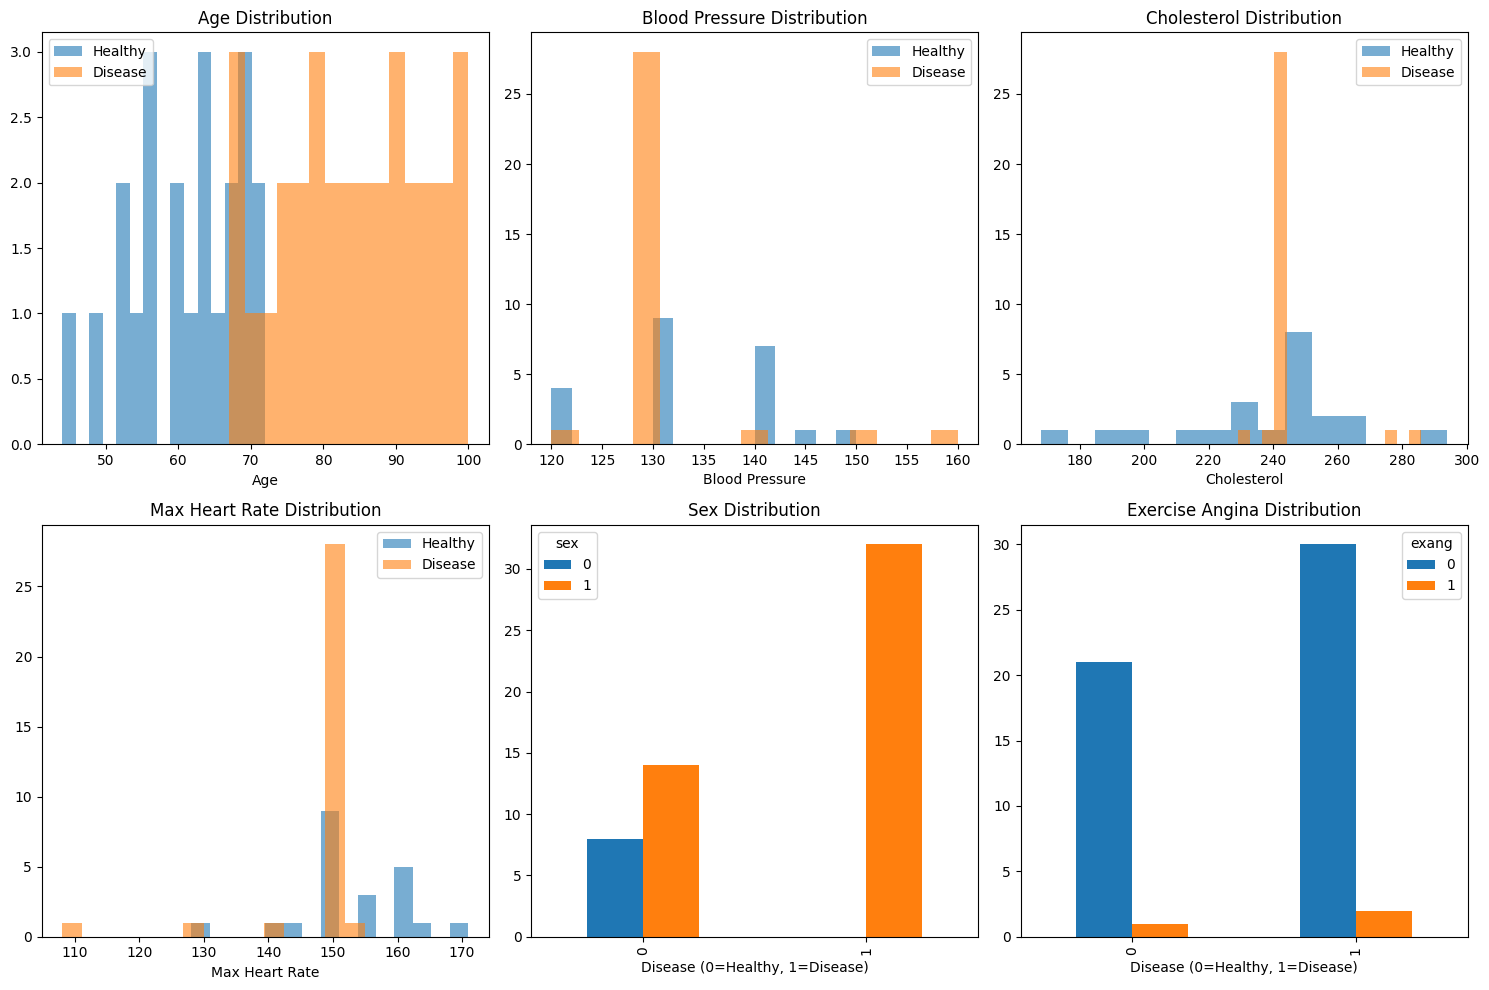

✅ Data visualization completed


In [12]:
# Data visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Select 6 key features for visualization
features = ['age', 'trestbps', 'chol', 'thalach', 'sex', 'exang']
feature_names = ['Age', 'Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'Sex', 'Exercise Angina']

for i, (feature, name) in enumerate(zip(features, feature_names)):
    if feature in ['sex', 'exang', 'cp', 'fbs']:
        # Categorical features
        df.groupby(['target', feature]).size().unstack().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{name} Distribution')
        axes[i].set_xlabel('Disease (0=Healthy, 1=Disease)')
    else:
        # Continuous features
        for disease in [0, 1]:
            subset = df[df['target'] == disease][feature]
            axes[i].hist(subset, alpha=0.6, label=f'{'Disease' if disease else 'Healthy'}', bins=15)
        axes[i].set_title(f'{name} Distribution')
        axes[i].set_xlabel(name)
        axes[i].legend()

plt.tight_layout()
plt.show()

print("✅ Data visualization completed")

In [13]:
# Split data for training
X = df.drop('target', axis=1)  # Features (all columns except target)
y = df['target']  # Target (0=healthy, 1=disease)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data split completed:")
print(f"📈 Training set: {X_train.shape[0]} patients")
print(f"📈 Test set: {X_test.shape[0]} patients")
print(f"📊 Training disease rate: {y_train.mean()*100:.1f}%")
print(f"📊 Test disease rate: {y_test.mean()*100:.1f}%")
print(f"✅ Features standardized for SVM analysis")

✅ Data split completed:
📈 Training set: 37 patients
📈 Test set: 17 patients
📊 Training disease rate: 59.5%
📊 Test disease rate: 58.8%
✅ Features standardized for SVM analysis
